In [85]:
import pandas as pd
import warnings
from plotly import express

populations = pd.read_csv('2024Populations.csv')



In [86]:
populations.head(5)

,rank,country,TwoLetterID,unMember,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
0,1,India,IN,True,696828385,1059633675,1240613620,1428627663,1441719852,1514994080,1670490596,2973190.0,13092189,0.009164,0.177614,484.906734
1,2,China,CN,True,982372466,1264099069,1348191368,1425671352,1425178782,1415605906,1312636325,9424702.9,-492570,-0.000346,0.175577,151.217370
2,3,United States,US,True,223140018,282398554,311182845,339996563,341814420,352162301,375391963,9147420.0,1817857,0.005347,0.042110,37.367304
3,4,Indonesia,ID,True,148177096,214072421,244016173,277534122,279798049,292150100,317225213,1877519.0,2263927,0.008157,0.034470,149.025416
4,5,Pakistan,PK,True,80624057,154369924,194454498,240485658,245209815,274029836,367808468,770880.0,4724157,0.019644,0.030209,318.090773


In [87]:
populations.isnull().sum()

rank                   0
country                0
TwoLetterID            1
unMember               0
pop1980                0
pop2000                0
pop2010                0
pop2023                0
pop2024                0
pop2030                0
pop2050                0
landAreaKm             0
2024YoYChange          0
2024YoYGrowthRate      0
2024WorldPercentage    0
Density_2024           0
dtype: int64

In [88]:
populations.dtypes

rank                     int64
country                 object
TwoLetterID             object
unMember                  bool
pop1980                  int64
pop2000                  int64
pop2010                  int64
pop2023                  int64
pop2024                  int64
pop2030                  int64
pop2050                  int64
landAreaKm             float64
2024YoYChange            int64
2024YoYGrowthRate      float64
2024WorldPercentage    float64
Density_2024           float64
dtype: object

In [89]:
# Unique countries
print(f"Unique countries: {populations['country'].nunique()}")

Unique countries: 234


In [90]:
populations.shape

(234, 16)

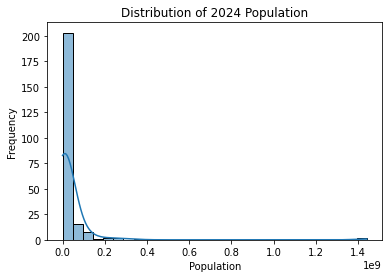

In [91]:
# Visualization the distribution of the population in 2024.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(populations['pop2024'], bins=30, kde=True)
plt.title('Distribution of 2024 Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


* sns.histplot() from seaborn creates a histogram of the data in populations['pop2024'].
* populations['pop2024'] is assumed to be a column of numeric data (likely population values for the year 2024).
* bins=30 specifies the number of bins (or intervals) into which the data is divided.
* kde=True overlays a kernel density estimate plot on the histogram, showing the distribution's shape more smoothly

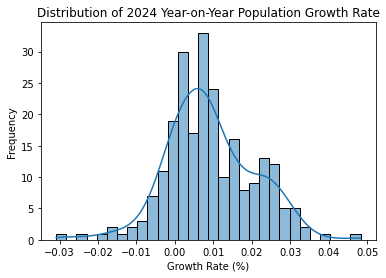

In [92]:
# Visualization the year-on-year population growth rate for 2024.
plt.figure(figsize=(6, 4))
sns.histplot(populations['2024YoYGrowthRate'], bins=30, kde=True)
plt.title('Distribution of 2024 Year-on-Year Population Growth Rate')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')
plt.show()

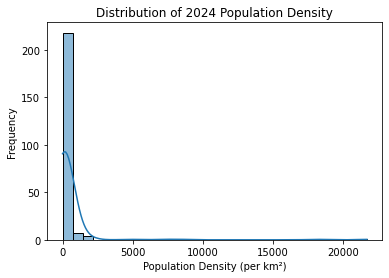

In [93]:
# Population density for 2024.
plt.figure(figsize=(6, 4))
sns.histplot(populations['Density_2024'], bins=30, kde=True)
plt.title('Distribution of 2024 Population Density')
plt.xlabel('Population Density (per km²)')
plt.ylabel('Frequency')
plt.show()

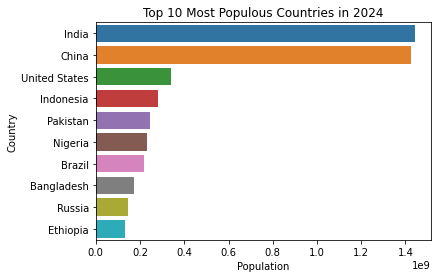

In [94]:
 # Top 10 most populous countries in 2024.
top_10_countries = populations.nlargest(10, 'pop2024')

plt.figure(figsize=(6,4))
sns.barplot(x='pop2024', y='country', data=top_10_countries)
plt.title('Top 10 Most Populous Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

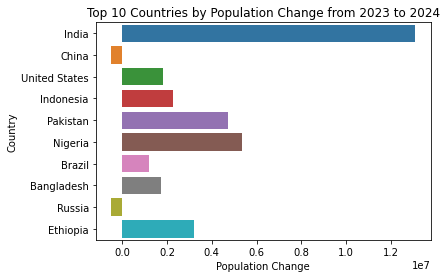

In [95]:
# Visualization the population change from 2023 to 2024.
plt.figure(figsize=(6,4))
sns.barplot(x='2024YoYChange', y='country', data=top_10_countries)
plt.title('Top 10 Countries by Population Change from 2023 to 2024')
plt.xlabel('Population Change')
plt.ylabel('Country')
plt.show()

In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = populations[['2024YoYGrowthRate', 'Density_2024']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

When choosing features for clustering, it's crucial to select attributes that effectively represent the underlying patterns and similarities in your dataset. Here are some considerations for selecting features for clustering:

Relevance to the Problem: Choose features that are relevant to the specific problem you're trying to solve with clustering. For example, if you're clustering customers based on their purchasing behavior, relevant features might include purchase frequency, total spending, and types of products bought.

Data Type: Clustering algorithms typically work with numerical data. Ensure your features are numeric or can be transformed into numeric form (e.g., categorical variables encoded as dummy variables or using techniques like one-hot encoding).

Feature Scaling: Clustering algorithms such as KMeans are sensitive to the scale of features. It's often beneficial to normalize or standardize features so that they have similar ranges. This prevents features with larger scales from dominating the clustering process.

Dimensionality: Consider the number of features relative to the number of data points (samples) in your dataset. High-dimensional data can pose challenges for clustering algorithms due to the curse of dimensionality. Feature selection or dimensionality reduction techniques like PCA (Principal Component Analysis) may be helpful in reducing the number of features while retaining important information.

Domain Knowledge: Utilize domain knowledge to identify features that are likely to capture meaningful differences between data points. Domain knowledge can also help in interpreting the clusters generated by the algorithm.

Noise and Outliers: Be mindful of noisy or outlier-prone features that may not contribute meaningfully to clustering. Preprocessing steps like outlier detection and removal may be necessary.

In [97]:
import warnings
warnings.filterwarnings("ignore")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
populations['Cluster'] = kmeans.fit_predict(scaled_features)

KMeans clustering is an iterative algorithm that partitions a dataset into K clusters by iteratively assigning each data point to the nearest cluster centroid and then recalculating the centroids based on the mean of the assigned points. It aims to minimize the variance within each cluster while maximizing the variance between clusters.


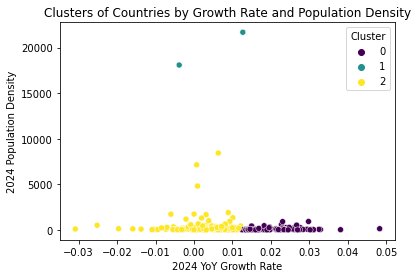

In [98]:
# Visualize clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x='2024YoYGrowthRate', y='Density_2024', hue='Cluster', data=populations, palette='viridis')
plt.title('Clusters of Countries by Growth Rate and Population Density')
plt.xlabel('2024 YoY Growth Rate')
plt.ylabel('2024 Population Density')
plt.legend(title='Cluster')
plt.show()

Most countries fall into Cluster 0 (purple), indicating a wide range of growth rates but generally lower population densities.Cluster 1 (teal) contains countries with very high population density, significantly higher than the other clusters, and these countries do not show extreme growth rates.Cluster 2 (yellow) includes countries with moderate growth rates and varying densities, but generally higher than those in Cluster 0.

A few outliers in Cluster 1 (teal) exhibit extraordinarily high population densities, suggesting these might be small but highly populated regions.



Visualize Population Distribution by UN Membership

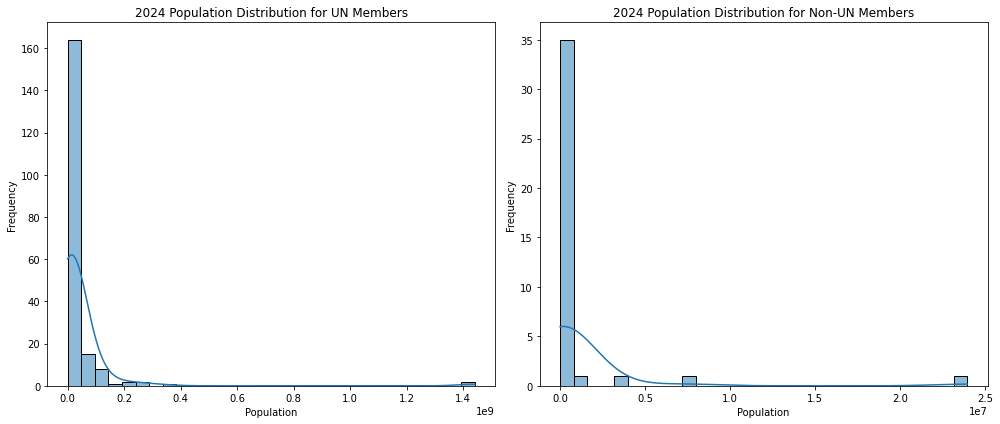

In [99]:
plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.histplot(populations[populations['unMember'] == True]['pop2024'], bins=30, kde=True)
plt.title('2024 Population Distribution for UN Members')
plt.xlabel('Population')
plt.ylabel('Frequency')

# Non-UN Members
plt.subplot(1, 2, 2)
sns.histplot(populations[populations['unMember'] == False]['pop2024'], bins=30, kde=True)
plt.title('2024 Population Distribution for Non-UN Members')
plt.xlabel('Population')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

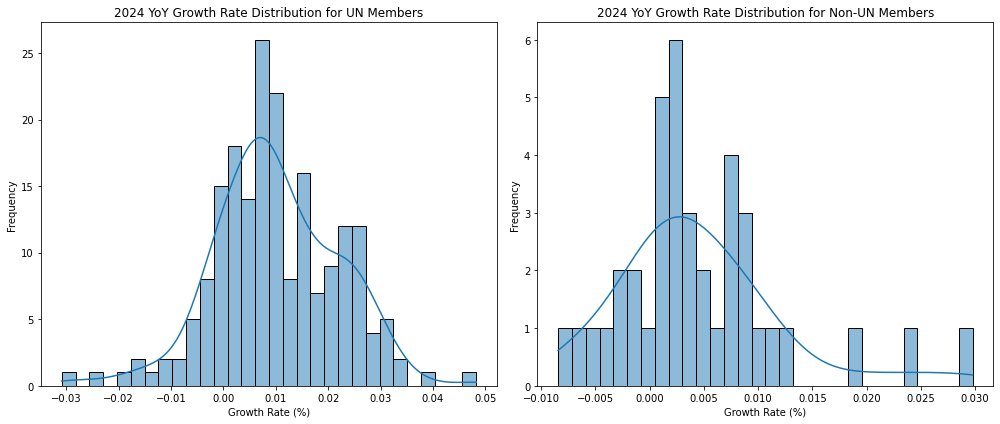

In [100]:
plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.histplot(populations[populations['unMember'] == True]['2024YoYGrowthRate'], bins=30, kde=True)
plt.title('2024 YoY Growth Rate Distribution for UN Members')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')

# Non-UN Members
plt.subplot(1, 2, 2)
sns.histplot(populations[populations['unMember'] == False]['2024YoYGrowthRate'], bins=30, kde=True)
plt.title('2024 YoY Growth Rate Distribution for Non-UN Members')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

For UN member countries, there are a few countries with a negative growth rate, and a few countries with a growth rate above 4%.

The distribution for non-UN member countries is more spread out than the distribution for UN member countries. There are non-UN member countries with a YoY growth rate below -5%

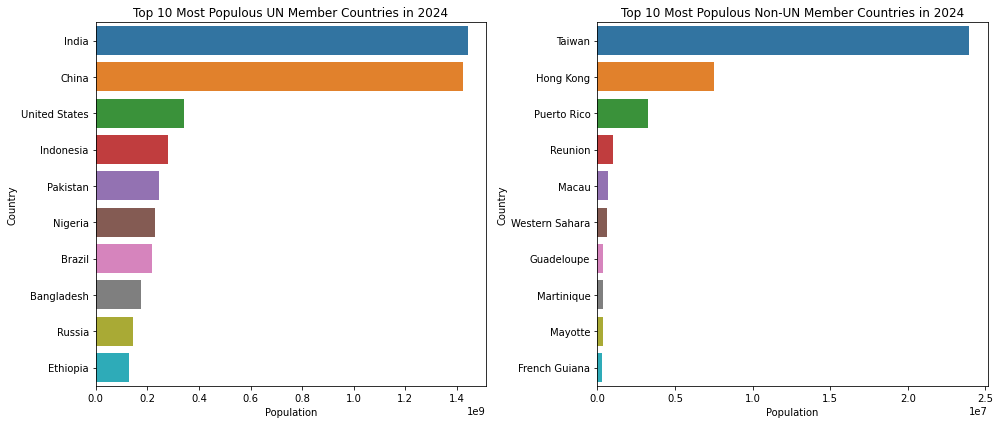

In [101]:
# Top 10 Most Populous Countries by UN Membership
# Top 10 UN Members
top_10_un_members = populations[populations['unMember'] == True].nlargest(10, 'pop2024')

plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.barplot(x='pop2024', y='country', data=top_10_un_members)
plt.title('Top 10 Most Populous UN Member Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')

# Top 10 Non-UN Members
top_10_non_un_members = populations[populations['unMember'] == False].nlargest(10, 'pop2024')

# Non-UN Members
plt.subplot(1, 2, 2)
sns.barplot(x='pop2024', y='country', data=top_10_non_un_members)
plt.title('Top 10 Most Populous Non-UN Member Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

The visualization above showcases the demographic landscape of global populations as of 2024, focusing on the top 10 most populous countries categorized by their United Nations (UN) membership status. This distinction offers a revealing glimpse into the distribution of population size among member and non-member states of the UN.

In the first subplot, titled "Top 10 Most Populous UN Member Countries in 2024," we observe a bar graph displaying population sizes on the x-axis and corresponding country names on the y-axis. This graph highlights the countries that are both highly populous and UN members, emphasizing their significance within the international community. Each bar's height represents the population of a specific country, providing a comparative view of their demographic influence.

Conversely, the second subplot, titled "Top 10 Most Populous Non-UN Member Countries in 2024," contrasts with the first by focusing on countries that, despite their large populations, are not part of the United Nations. This comparison sheds light on notable population centers outside the UN framework, underscoring geopolitical diversity and global demographic trends.

The dual-subplot design allows for a straightforward visual comparison between these two groups: UN member countries and non-member countries. Such visualizations are crucial for understanding how population dynamics intersect with international relations and geopolitical alignments, offering insights into the relative influence and demographics of nations worldwide.

In [103]:
express.scatter(data_frame=populations.sort_values(by='pop2024').reset_index(), y='pop2024', hover_name='country', log_y=True, color='unMember')

In [107]:
express.scatter(data_frame=populations.sort_values(by='Density_2024').reset_index(), y='Density_2024', hover_name='country', log_y=True, color='unMember')

In [105]:
express.scatter(data_frame=populations, x='pop1980', y='pop2050', log_x=True, log_y=True, hover_name='country', color='2024YoYGrowthRate')

The scatter plot created above offers a dynamic visualization of population data from the populations DataFrame, utilizing logarithmic scales for both the x-axis (pop1980) and y-axis (pop2050). This logarithmic scaling helps in effectively displaying a wide range of population sizes and growth rates across countries.

Each data point on the plot represents a country, with its position determined by its population in 1980 (x-axis) and projected population in 2050 (y-axis). Hovering over any point reveals the corresponding country name, providing interactive exploration of individual data points. The color of each point indicates the 2024 year-on-year growth rate, offering insights into the relative population growth rates among different countries.

This scatter plot serves as a powerful tool for visualizing global demographic trends and disparities over time. It allows viewers to identify countries with varying initial population sizes in 1980 and observe how their populations are projected to change by 2050, considering their respective growth rates. Such visualizations are instrumental in understanding demographic shifts, planning for future population dynamics, and studying the impact of growth rates on global socio-economic trends and policy decisions.

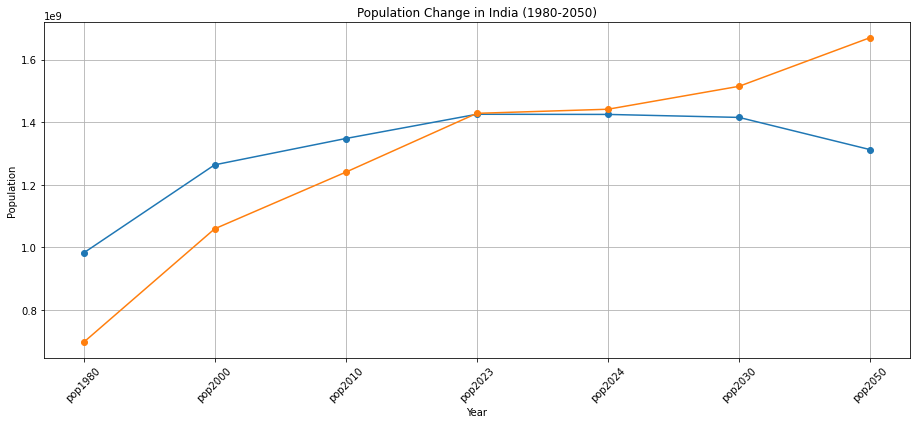

In [102]:
china_data = populations[populations['country'] == 'China']
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 2)
plt.plot(china_data.columns[4:11], china_data.iloc[0, 4:11], marker='o')
plt.title('Population Change in China (1980-2050)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)


India_data = populations[populations['country'] == 'India']

plt.subplot(1, 2, 2)
plt.plot(India_data.columns[4:11], India_data.iloc[0, 4:11], marker='o')
plt.title('Population Change in India (1980-2050)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)


plt.tight_layout()
plt.show()

The plotted graphs above illustrate the projected population changes for China and India from 1980 to 2050. Each subplot provides a distinct view of how population sizes in these countries are expected to evolve over time.

In the first subplot, focusing on China, the x-axis denotes years spanning from 1980 to 2050, while the y-axis represents population figures in billions. The data points, marked by circles (o), plot China's population estimates across these years, revealing trends and fluctuations over the decades. The graph shows both historical data and future projections, offering insights into China's demographic trajectory and its implications for global population dynamics.

Similarly, the second subplot centers on India, employing the same x-axis for years and y-axis for population in billions. Marked by circles (o), the plotted points illustrate India's anticipated population changes from 1980 to 2050. This visualization provides a comparative analysis with China, showcasing India's distinct demographic patterns, growth rates, and projections over the studied period.

The layout and design of these subplots facilitate a clear comparison between China and India, two of the world's most populous countries, highlighting their demographic trends and potential future trajectories. Such visual representations are essential for understanding population dynamics, informing policy decisions, and anticipating social and economic challenges associated with population growth in these key global regions.